<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass_09Association_Rules(movies).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import liabraries**

In [1]:
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

# **Read CSA File**

In [2]:
movies = pd.read_csv('/content/my_movies.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **EDA**

In [3]:
movies.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movies.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 15)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Adjust data set removing unwanted columns**

In [9]:
df = movies.iloc[:,5:]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


## **Cheaking null values**

In [12]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [10]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Apriori Algorithm**

### **Associations Rule with 0.10% support and 0.70% confidence interval**

In [14]:
frequent_itemsets = apriori(df,min_support=.1,use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


# **Rules**

In [15]:
rules=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.7)
rules
rules.sort_values('lift',ascending=False)[:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
212,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
225,"(Sixth Sense, LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
213,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
168,"(Sixth Sense, LOTR1)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
211,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
137,"(Sixth Sense, Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
141,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
144,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
148,(LOTR),"(Sixth Sense, Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
201,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [16]:
rules[rules.lift>1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
247,(LOTR1),"(Sixth Sense, LOTR2, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


# **Scatter plot Between Support Vs Confidance**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


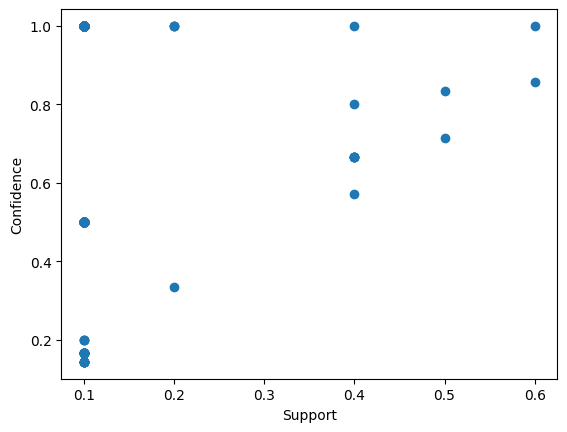

In [17]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()